In [1]:
import pandas as pd # for loading data
import scipy.stats as stats
import pylab as pl
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter # For counting word frequencies
import re # for removing special characters
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.corpus import stopwords # For removing stopwords


from sklearn.model_selection import train_test_split

[nltk_data] Downloading package wordnet to
[nltk_data]     /home/nicktehrany/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/nicktehrany/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# odf = pd.read_csv('songs_dataset.csv')

In [3]:
# odf_genre_count = odf['Genre'].value_counts()
# #print(odf_genre_count)
# odf_genre_count = odf_genre_count[0:15]
# #odf_genre_count.plot(kind="bar", title="Original Dataset Genre Frequency")

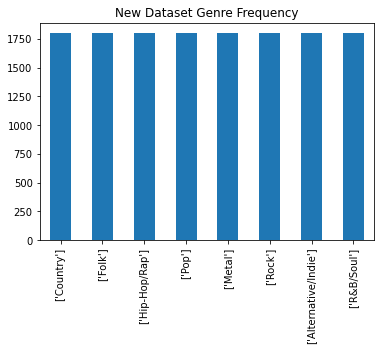

In [4]:
edf = pd.read_csv('dataset.csv')
edf_genre_count = edf['Genre'].value_counts()
# print(odf_genre_count)
edf_genre_count.plot(kind="bar", title="New Dataset Genre Frequency")

## Cleaning Lyrics (Lemmatizing, etc..) and counting each words frequency (Only for the first ten songs right now) **Has dropping of words with frequency count below a certain number**

In [5]:
corpus = []
lyrics = edf['Lyrics']
sw = stopwords.words("english")
for i in range(0, 1):
    text = re.sub('[^a-zA-Z]', ' ', str(lyrics[i])) # removes special characters
    text = text.lower() # lowercases everything
    text = text.split() # splits words
    text = [wordnet_lemmatizer.lemmatize(word, pos="v") for word in text if not word in set(sw)]
    corpus.append(text)
    
    #Removes all words occuting less than 3 times
    counts = Counter(text)
    print(counts)
    index = 0
    for words in counts:
        if list(counts.values())[index] < 3:
            text = list(filter((list(counts.keys())[index]).__ne__, text))
        index += 1
    counts = Counter(text)
    print(counts)
# lyrics = corpus
# for text in lyrics:
#     counts = Counter(text)
#     print(counts.most_common(20))
#     print("\n")

Counter({'killer': 31, 'fuck': 16, 'nine': 13, 'gon': 12, 'cock': 12, 'kill': 12, 'motherfucker': 12, 'mane': 5, 'ring': 4, 'bitch': 3, 'hoe': 3, 'chain': 2, 'cause': 2, 'go': 2, 'store': 2, 'leave': 2, 'blow': 2, 'bag': 2, 'like': 2, 'get': 2, 'phone': 2, 'live': 2, 'nowmane': 1, 'fifty': 1, 'shade': 1, 'grey': 1, 'still': 1, 'glow': 1, 'shin': 1, 'diamond': 1, 'birthstone': 1, 'change': 1, 'dope': 1, 'cocaine': 1, 'look': 1, 'crow': 1, 'kick': 1, 'brandon': 1, 'blood': 1, 'ice': 1, 'cold': 1, 'vein': 1, 'carecrow': 1, 'make': 1, 'escrow': 1, 'gain': 1, 'pimp': 1, 'freeze': 1, 'old': 1, 'black': 1, 'mustang': 1, 'alone': 1, 'yesterday': 1, 'ride': 1, 'bike': 1, 'moon': 1, 'think': 1, 'trippin': 1, 'shrooms': 1, 'smoke': 1, 'pcp': 1, 'crimmy': 1, 'mentally': 1, 'penitentiary': 1, 'meth': 1, 'lab': 1, 'chemistry': 1, 'heisenberg': 1, 'burbs': 1, 'talk': 1, 'slur': 1, 'bird': 1, 'kickin': 1, 'curb': 1, 'yung': 1, 'christ': 1, 'save': 1, 'world': 1, 'crucify': 1, 'upside': 1, 'rotten': 1,

## Frequency Analysis on the release dates of the songs

In [6]:
date_count = edf['Date'].value_counts()
#print(date_count)
# date_count[0:20].plot(kind="bar", color="red", title="Genre")
singer_count = edf['Singer'].value_counts()
#print(singer_count)
#singer_count[0:20].plot(kind="bar", color="red", title="Singers")

## Error Bars for the accuracy scores of the neural networks

In [106]:
import numpy as np

cnn_train = np.array([57.88, 58.17, 59.01, 58.91, 58.29, 58.23, 57.67, 58.40, 58.79, 58.39])
cnn_test = np.array([48.56, 48.37, 48.19, 47.54, 48.75, 47.82, 48.19, 47.96, 46.01, 47.64])
cnn_val = np.array([47.01, 46.45, 47.90, 48.04, 47.48, 47.71, 47.11, 46.69, 48.13, 48.37])
nn_train = np.array([54.79, 54.74, 54.46, 54.50, 54.21, 55.11, 54.31, 54.12, 55.00, 54.37])
nn_val = np.array([54.01, 53.97, 54.15, 54.30, 53.83, 54.48, 54.76, 53.64, 54.58, 53.45])
nn_test = np.array([54.48, 55.03, 54.79, 55.12, 55.19, 55.83, 55.00, 54.07, 55.23, 55.42])

In [107]:
# Calculate the average
cnn_train_mean = np.mean(cnn_train)
cnn_test_mean = np.mean(cnn_test)
cnn_val_mean = np.mean(cnn_val)
nn_train_mean = np.mean(nn_train)
nn_test_mean = np.mean(nn_test)
nn_val_mean = np.mean(nn_val)

In [108]:
# Calculate the standard deviation
cnn_train_std = np.std(cnn_train)
cnn_test_std = np.std(cnn_test)
cnn_val_std = np.std(cnn_val)
nn_train_std = np.std(nn_train)
nn_test_std = np.std(nn_test)
nn_val_std = np.std(nn_val)

In [109]:
# Create lists for the plot
sets = ['CNN Train', 'CNN Val', 'CNN Test', 'ANN Train', 'ANN Val', 'ANN Test',]
x_pos = np.arange(len(sets))
CTEs = [cnn_train_mean, cnn_val_mean, cnn_test_mean, nn_train_mean, nn_val_mean, nn_test_mean]
error = [cnn_train_std, cnn_val_std, cnn_test_std, nn_train_std, nn_val_std, nn_test_std]

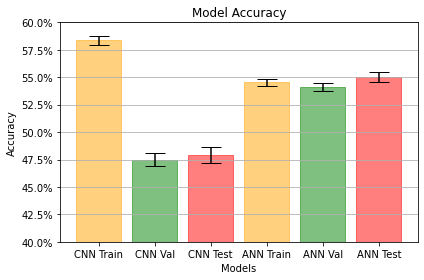

In [110]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Build the plot
fig, ax = plt.subplots()
plot = ax.bar(x_pos, CTEs, yerr=error, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_ylabel('Accuracy')
ax.set_xlabel('Models')
ax.set_xticks(x_pos)
ax.set_xticklabels(sets)
ax.set_title('Model Accuracy')
ax.yaxis.grid(True)
plot[0].set_color('orange')
plot[1].set_color('green')
plot[2].set_color('red')
plot[3].set_color('orange')
plot[4].set_color('green')
plot[5].set_color('red')
ax.yaxis.set_major_formatter(ticker.PercentFormatter())
ax.set_ylim([40,60])

# Save the figure and show
plt.tight_layout()
plt.savefig('nn_error_bars.png')
plt.show()

In [93]:
print(cnn_test_mean)

47.903
